## Visualization of Historical Weather Patterns in Galesburg (Knox County) Illinois and Correlation with Crop Yield 

by Kelli Davies

<a id='contents'></a>
### This project is divided into two parts:

### **I.** [Historical Temperature Trends](#part1)

In the first part, the daily record highs and lows throughout the year from 1900 to 2017 are analyzed. Record temperatures that were achieved recently (the last 8 years) are  annotated. The relative frequency of these new records is calculated.  There appears to be a disproportionate amount of record highs in the last 8 years of the data. 

The average temperature per month for each year is plotted for both average lows and average highs.  The large variability from one year to another precludes trends, if any, from being discerned. The average highs and lows are then replotted using an average from a sliding ten year window and the averages for the past 20 years vs all data are calculated. From the average lows, it looks like there is potentially an increase in temperature in more recent years.  From the average highs, there is no discernible trend in average daily high across the data.  See the conclusion section at the end for additional discussion.

### **II.** [Correlation between Weather and Crop Yield ](#part2)

This section analyzes correlation between monthly temperature/precipitation metrics and soy/corn crop yields in the Knox County/Galesburg, IL area.  The monthly weather metrics are aggregated by quarter to generate statistics for different phases of the agricultural growth cycle.  The information is combined with yearly crop yield data to understand what metrics are associated with greater corn and soy yields.   

The soy and corn yields did not strongly correlate with each other, and each displayed weak to moderate correlation values with distinct metrics.  For soy, rainfall was associated with crop yield.  Consistent rain (e.g., more days with precipitation) was more important than the total amount of rainfall. For corn, temperature was important.  Higher temperatures in Q3 (summer, growing season) were negatively correlated with yields, indicating mild summers as favorable, and higher temperatures in Q4 (fall, harvest time) were negatively correlated, indicating warmer (milder) temperatures during this time as favorable. See the summary and conclusion sections for additional discussion. 

<a id='part1'></a>
## [Part I. Historical Temperature Trends](#contents)

*Read in weather data obtained for Galesburg, IL (Knox County) from NAOO.gov (daily min/max info from Jan 1990 to Dec 2017) and separate month/day/year data for subsequent analysis groupings:*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

weather = pd.read_csv("GalesburgNAOO.csv")

weather['DATE'] = pd.to_datetime(weather['DATE'])
weather["year"] = weather['DATE'].apply(lambda x: x.year)

weather["year"] = pd.to_numeric(weather["year"])
weather["month"] = weather["DATE"].apply(lambda x: x.month)
weather["month-day"] = weather['DATE'].apply(lambda x: x.strftime('%m-%d'))
weather = weather[weather["month-day"] != "02-29"]

#Remove erroneous data point (-49C reported for 5/30/1915)
weather.drop(weather.index[42555], inplace=True)

#There are multiple weather stations, calc average low/high temps for each day 
weather["TMIN"] = weather["TMIN"].groupby(weather["DATE"]).transform('mean')
weather["TMAX"] = weather["TMAX"].groupby(weather["DATE"]).transform('mean')
weather.drop_duplicates(subset="DATE", inplace=True)
weather.sort_values("DATE", inplace=True)

weather.head()

,STATION,NAME,DATE,PRCP,SNOW,TMAX,TMIN,year,month,month-day
0,USC00113320,"GALESBURG, IL US",1900-01-01,0.0,0.0,-5.0,-15.30,1900,1,01-01
1,USC00113320,"GALESBURG, IL US",1900-01-02,0.0,0.0,-0.3,-14.15,1900,1,01-02
2,USC00113320,"GALESBURG, IL US",1900-01-03,0.0,0.0,1.1,-16.95,1900,1,01-03
3,USC00113320,"GALESBURG, IL US",1900-01-04,0.0,0.0,8.3,-6.95,1900,1,01-04
4,USC00113320,"GALESBURG, IL US",1900-01-05,0.0,0.0,8.9,-1.95,1900,1,01-05


*Identify new records reached in the final 8 years (2010 to 2017) compared to the previous 110 years (1900 to 2009):*

In [2]:
# mins and maxes for both time periods (1900 - 2009 and 2010 -2017)
pre_2010 = weather[(weather["year"] >= 1900) & (weather["year"] <= 2009)]
mins_pre_2010 = pre_2010.groupby("month-day")["TMIN"].min().tolist()
maxes_pre_2010 = pre_2010.groupby("month-day")["TMAX"].max().tolist()

last_8_years = weather[(weather["year"] >= 2010) & (weather["year"] <= 2017)]
mins_last_8 = last_8_years.groupby("month-day")["TMIN"].min().tolist()
maxes_last_8 = last_8_years.groupby("month-day")["TMAX"].max().tolist()

#Determine which days from 2010-2017 there was a new min or max set:
df_all = pd.DataFrame({"mins_pre_2010": mins_pre_2010, 
                       "maxes_pre_2010": maxes_pre_2010, 
                       "mins_last_8": mins_last_8, 
                       "maxes_last_8": maxes_last_8})

record_mins_last_8df = df_all[df_all["mins_last_8"] < df_all["mins_pre_2010"]]
record_maxes_last_8df = df_all[df_all["maxes_last_8"] > df_all["maxes_pre_2010"]]

record_mins_last_8 = record_mins_last_8df["mins_last_8"].tolist()
index_mins_last_8 = record_mins_last_8df.index.tolist()

record_maxes_last_8 = record_maxes_last_8df["maxes_last_8"].tolist()
index_maxes_last_8 = record_maxes_last_8df.index.tolist()



*Visualization of Data*

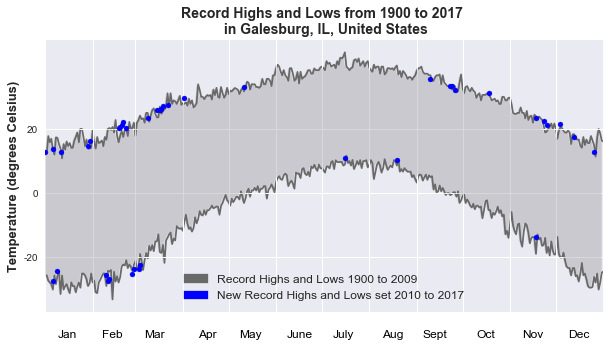

In [3]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.patches as mpatches

%matplotlib inline

plt.figure(figsize=(10,5))
plt.xlim([0,365])

plt.plot(list(range(1,366)),mins_pre_2010, '-', markersize=1, color='dimgray', zorder=0)  
plt.plot(list(range(1,366)),maxes_pre_2010, '-', markersize=1, color='dimgray', zorder=0) 
plt.scatter(index_mins_last_8, record_mins_last_8, s=25, color='blue', zorder=5)
plt.scatter(index_maxes_last_8, record_maxes_last_8, s=25, color='blue', zorder=5)

plt.ylabel('Temperature (degrees Celsius)', fontweight='bold', fontsize=13)
plt.title('Record Highs and Lows from 1900 to 2017 \n in Galesburg, IL, United States', 
          fontsize=14, fontweight='bold')

plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
plt.tick_params(axis='x',which='minor',bottom='on')
xlabel_ticks = [8, 37, 65, 100, 127, 158, 188, 220, 247,
              282, 312, 342]
label_coords = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
xlabels=["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.xticks(label_coords, label_coords)
style = dict(size=12, color='black') 

for i in range(0, 12):
    plt.text(xlabel_ticks[i], -45, xlabels[i] , **style)
ax = plt.axes()
ax.xaxis.set_major_formatter(plt.NullFormatter())

for spine in plt.gca().spines.values():
    spine.set_visible(False)

yticks = [-20, 0, 20]
plt.yticks(yticks, yticks)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
plt.gca().fill_between(range(len(mins_pre_2010)), 
                       mins_pre_2010, maxes_pre_2010, 
                       facecolor='dimgray', 
                       alpha=0.25)
plt.legend()
grayp = mpatches.Patch(color='dimgray', label='Record Highs and Lows 1900 to 2009')
bluep = mpatches.Patch(color='blue', label='New Record Highs and Lows set 2010 to 2017')
plt.legend(handles=[grayp, bluep], fontsize=12, frameon=False)
plt.show()

*Frequency of records in recent history*

In [4]:
print("Days in last 8 years with record lows: " + str(len(record_mins_last_8)))
print("Days in last 8 years with record highs: " + str(len(record_maxes_last_8)))

Days in last 8 years with record lows: 12
Days in last 8 years with record highs: 29


**Summary:** 

There is potentially a greater than expected amount of extreme values for 8 out of 118 years; in the past 8 years, 15 new record lows and 28 new record highs were observed from the time period spanning back to 1900 (118 years). The past 8 years represents 6.8% of the total data.  If the highs/lows were evenly spread out, we would expect 7 or 8 new records each for min and max.  We observed more than 8 for both highs and lows, and more than twice as many highs as lows. Together, these new records may indicate that weather has been more variable in recent years and there is a greater tendency for highs. 

Next, the average temperatures by month will be analyzed. 

*Plot historical changes in average low temperatures, dividing the data by months.*

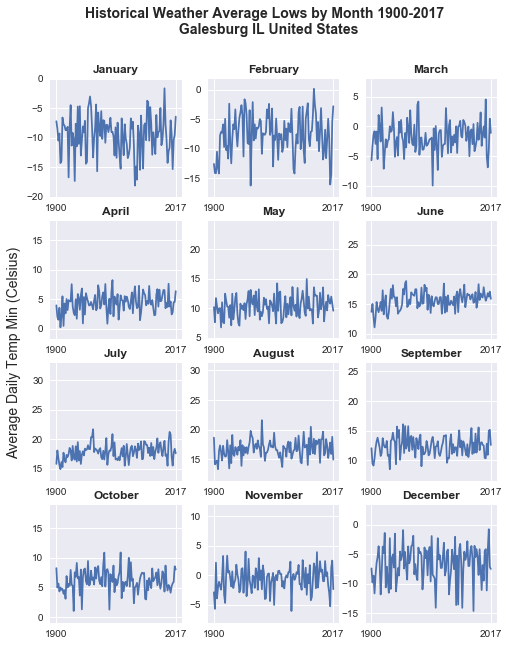

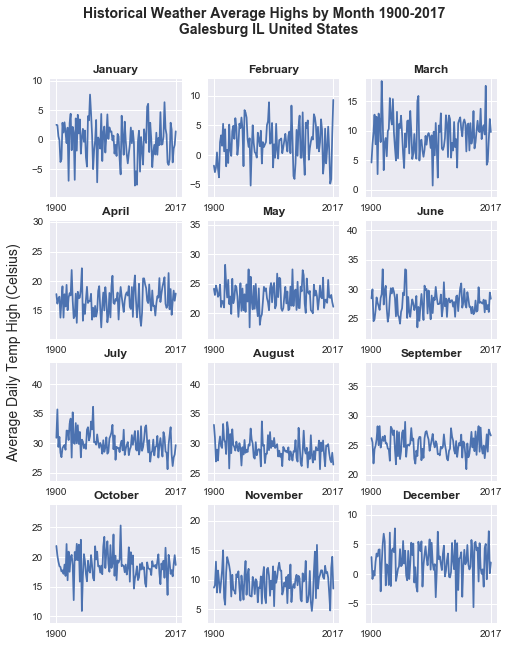

In [5]:
by_month_max = weather.groupby(["year", "month"])["TMAX"].mean()
by_month_min = weather.groupby(["year", "month"])["TMIN"].mean()
by_month = pd.concat([by_month_max, by_month_min], axis=1).reset_index()

temps =["TMIN", "TMAX"]
for temp in temps:
    if temp != "TMIN":
        print("\n\n")
        
    fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(4,3, figsize=(8, 10))
    if temp == "TMIN":
        plt.suptitle("Historical Weather Average Lows by Month 1900-2017 \n Galesburg IL United States", fontsize=14, fontweight='bold')
        fig.text(0.05, 0.5, 'Average Daily Temp Min (Celsius)', va='center', fontsize=14, rotation='vertical')
    
    if temp == "TMAX":
        plt.suptitle("Historical Weather Average Highs by Month 1900-2017 \n Galesburg IL United States", fontsize=14, fontweight='bold')
        fig.text(0.05, 0.5, 'Average Daily Temp High (Celsius)', va='center', fontsize=14, rotation='vertical')
    
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
          "October", "November", "December"]
    for i, ax in enumerate(axes):
        month = by_month[by_month["month"]==(i+1)]
        ax.plot(month["year"], month[temp], "-", markersize=1)   
        ax.set_title(months[i], fontweight='bold')
        ax.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
        x = plt.gca().xaxis
        ax.set_ylim(month[temp].min()-2,month[temp].min()+18)
        ax.set_xticks([1900,2017])
        ax.set_xticklabels(["1900","2017"])
    plt.show()

**Summary:** 

Looking at daily minimums averaged over monthly windows, there are no clear overall trends.  For the average lows (top panels), the months of April, May and June trend upwards slightly, but there is a lot of variability among consecutive years. No striking trends were observed in plots generated for TMAX averages by month.  Differences, if any, are too subtle to be observed with the current visualizations.  

To potentially minimize the variability and discern larger trends (if any), 10 year averages will be calculated next and the average across all the data vs the average from just the past 20 years will be calculated. 

*Generate 10 year averages for each month*

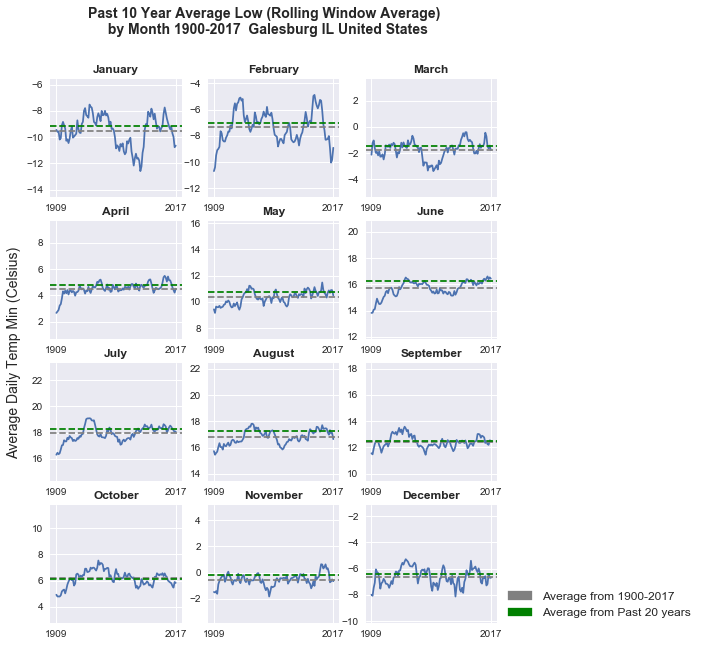

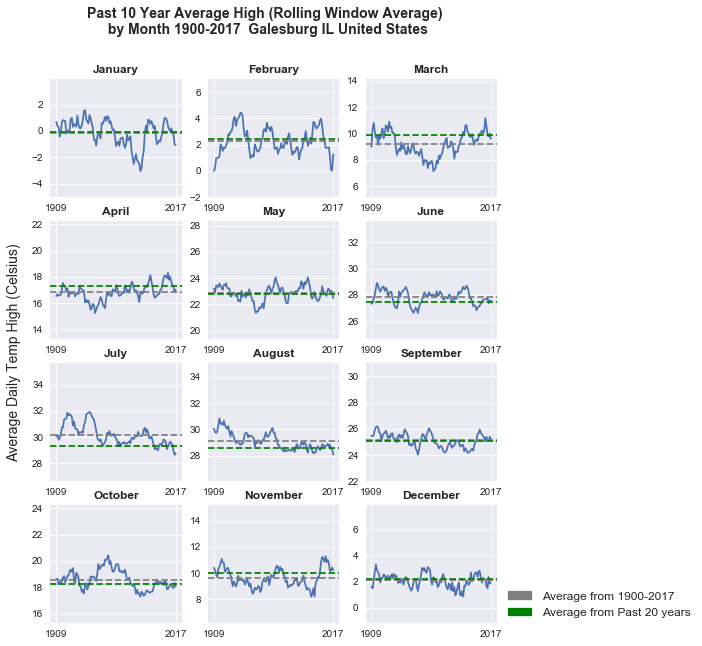

In [6]:
window_min = list()
window_max = list()

by_month2 = by_month.sort_values(["month", "year"],  ascending=[True, True])
by_month2.reset_index(inplace=True)

for m in range(1, 13):
    months = by_month2[by_month2["month"] == m].reset_index()
    
    for i in range(0, len(months)):
        if i <9:
            window_min.append(np.NaN)
            window_max.append(np.NaN)    
        else:
            window_min.append(np.mean(months["TMIN"][i-9:i+1]))
            window_max.append(np.mean(months["TMAX"][i-9:i+1]))

by_month2["window_min"] = window_min
by_month2["window_max"] = window_max

by_month2 = by_month2[9:] 

#Make plot

import matplotlib.patches as mpatches

temps =["window_min", "window_max"]
for temp in temps:
    if temp != "window_min":
        print("\n\n")
    fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(4,3, figsize=(8, 10))
    
    if temp == "window_min":
        plt.suptitle("Past 10 Year Average Low (Rolling Window Average) \n by Month 1900-2017  Galesburg IL United States", fontsize=14, fontweight='bold')
        fig.text(0.05, 0.5, 'Average Daily Temp Min (Celsius)', va='center', fontsize=14, rotation='vertical')
    if temp == "window_max":
        plt.suptitle("Past 10 Year Average High (Rolling Window Average) \n by Month 1900-2017  Galesburg IL United States", fontsize=14, fontweight='bold')
        fig.text(0.05, 0.5, 'Average Daily Temp High (Celsius)', va='center', fontsize=14, rotation='vertical')
    
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
          "October", "November", "December"]
    for i, ax in enumerate(axes):
        month = by_month2[by_month2["month"]==(i+1)]
        ax.plot(month["year"], month[temp], "-", markersize=1)   
        ax.set_title(months[i], fontweight='bold')
        ax.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
        ax.axhline(y=month[temp].mean(), color='gray', linestyle='--')
        ax.axhline(y=month[month['year'] > 1996][temp].mean(), color='green', linestyle='--')
        x = plt.gca().xaxis
        ax.set_ylim(month[temp].min()-2,month[temp].min()+7)
        ax.set_xticks([1909,2017])
        ax.set_xticklabels(["1909","2017"])
    gray_patch = mpatches.Patch(color='gray', label='Average from 1900-2017')
    green_patch = mpatches.Patch(color='green', label='Average from Past 20 years')
    plt.legend(handles=[gray_patch, green_patch], fontsize=12, bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    plt.show()




**Summary:**

The ten year average reduces the variability but there are still considerable fluctuations up and down across the 118 year span.  The averages from the past 118 years vs the averages from the past twenty years do suggest some trends for the average lows.  For almost every month, the average low is higher from the past twenty years than from all of the data.  For the average highs, however, the data appears somewhat random with some months have higher averages for the past 20 years and others lower. 

**Interpretation and Conclusion:**


In the Record Highs/Lows analysis, there was a disporportionate amount of records set in the previous eight years, particularly for high temperatures.

Due to large fluctuations in average daily highs/lows, it was difficult to draw strong conclusions from the average temperature data.  While there is scientific concensus that early temepratures are rising (NOAA.gov) the overall temperature increase globally is small (approx 0.8C) relative to changes in temperature most locations experience throughout a calendar year.  Additionally, the affects of climate change can be associated with more drastic weather fluctuations, which can also make small changes less discernible and we are looking at only a very small piece of the planet.  To minimize some of the variability, I took ten year averages and a final twenty year summary, which allow for only modest improvement.  While I wanted a broader look at the data, I was concerned that averaging temperatures across an entire month may have reduced resolution, as the beginning and ends of the months can be very different; perhaps following the trends for individual days would allow a more discernible trend.  With this possibility in mind, I re-analyzed the average highs/ lows for each year, each 10 year interval, and the final 20 years (vs all) using only data from the first day of each month across the entire 118 year range (not shown).  Such analysis showed similar trends and did not provide additional information. 

Overall, my analysis here indicates a subtle increase in temperature across the 118 year span reveals considerable variability in temperature from one year to the next.

<a id='part2'></a> 
## [Part II: Weather and Crop Yield Analysis:](#contents)
### Goal: Determine which weather metrics correlate with soybean and corn yields (bushels/acre) in the Galesburg IL (Knox County) area. 

In this part, temperature and precipitation metrics will be aggregated and analyzed for potential correlation with soybean and corn yields.  Are differences in specific metrics throughout the growing season associated with crop yields?  Are soy and corn yields associated with the same or different metrics? In the previous part, I worked with temperature metrics recorded by day.  In this section, I use a larger suite of metrics reported on a monthly basis for the analysis.

####   The monthly data file obtained from NAOO.gov contains the following <font color='blue'>precipitation</font> and <font color='red'>temperature</font> metrics for each month of the year:

<font color='blue'><b>DPO1</font></b> – Number of days with >= 0.01 inch (0.254mm) rain  <br>
<font color='blue'><b>DP10</font></b> – Number of days with >= 1.00 inch (25.4mm) rain <br>
<font color='blue'><b>PRCP</font></b> – Total monthly precipitation (mm) <br>
<font color='blue'><b>SNOW</b></font> – Total monthly snow (mm)<br>

<font color='red'><b>DX90</b></font> – Number of days with maximum temperature >= 90F/32.2C<br>
<font color='red'><b>DX70</b></font> – Number of days with maximum temperature >= 70F/21.1C <br>
<font color='red'><b>DX32</b></font> – Number of days with maximum temperature <= 32F/0C<br>
<font color='red'><b>DT32</b></font> – Number of days with minimum temperature <= 32F/0C<br>
<font color='red'><b>TMAX</b></font> – Average daily max temp for the month in C<br>
<font color='red'><b>TMIN</b></font> – Average daily min temp for the month in C<br>

#### Monthly data metrics will be aggregated into quarterly data (Q1: Jan-Mar, Q2: Apr-Jun, Q3: Jul-Sep, Q4: Oct-Dec) for each year. 
#### Seasonal Illinois crop farming cycle from the USDA Agricultural handbook:

* Soybean planting: April 22-May 28 (Q2) 
* Soybean harvesting: Sept 24 - Nov 19 (end of Q3, and Q4)
* Corn planting: May 6- June 16 (Q2) 
* Corn harvesting: Sept 23 - Nov 3 (end of Q3, and Q4)

https://usda.mannlib.cornell.edu/usda/nass/planting/uph97.pdf     Accessed Jan 2018

### Historical crop yields from University of Illinois FarmDoc website contains crop yields by year. 
Illinois historic crop yields: http://www.farmdoc.illinois.edu/manage/pricing/   Accessed Jan 2018

The crop yield data contains records for Knox County from 1972 to 2007 and so weather from corresponding years will be selected.

Correlation calculations will be used to determine which weather factors at which seasons (quarters) have the strongest impact on corn and soybean yields



*Open Monthly Weather data for Galesburg, IL obtained from NAOO.gov and label quarters*

In [7]:
monthly_data = pd.read_csv("NAOO_monthlydata.csv")
monthly_data = monthly_data[monthly_data["NAME"]== "GALESBURG, IL US"]
monthly_data["year"] = monthly_data["DATE"].apply(lambda x: x[0:4])
monthly_data["month"] = monthly_data["DATE"].apply(lambda x: x[-2:])
monthly_data["year"] = pd.to_numeric(monthly_data["year"])
monthly_data = monthly_data[(monthly_data["year"] >= 1972) & (monthly_data["year"] <= 2007)]

def quarter(row):
    m = row["month"]
    quarters = list(range(1,5))
    for i in quarters:
        if int(m) <= i*3:
            return i
        
monthly_data["quarter"] = monthly_data.apply(quarter, axis=1)    

monthly_data["TMIN"] = monthly_data["TMIN"].groupby(monthly_data["DATE"]).transform('mean')
monthly_data["TMAX"] = monthly_data["TMAX"].groupby(monthly_data["DATE"]).transform('mean')
weather.drop_duplicates(subset="DATE", inplace=True)
weather.sort_values("DATE", inplace=True)
monthly_data.head()

,STATION,NAME,DATE,DP01,DP10,DT32,DX32,DX70,DX90,PRCP,SNOW,TMAX,TMIN,year,month,quarter
580,USC00113320,"GALESBURG, IL US",1972-01,7.0,3.0,30.0,12.0,0.0,0.0,18.9,278.0,-1.4,-11.9,1972,01,1
581,USC00113320,"GALESBURG, IL US",1972-02,10.0,4.0,28.0,13.0,1.0,0.0,22.5,249.0,1.1,-9.5,1972,02,1
582,USC00113320,"GALESBURG, IL US",1972-03,12.0,7.0,23.0,3.0,1.0,0.0,54.8,216.0,8.1,-3.3,1972,03,1
583,USC00113320,"GALESBURG, IL US",1972-04,13.0,8.0,8.0,0.0,6.0,0.0,114.2,0.0,15.0,3.5,1972,04,2
584,USC00113320,"GALESBURG, IL US",1972-05,11.0,7.0,0.0,0.0,20.0,0.0,68.0,0.0,23.2,10.9,1972,05,2


*Consolidate monthly data metrics into quarters:*

In [8]:
quarterly_statistics = {}
sum_cols = ["DP01", "DP10", "PRCP", "SNOW", "DT32", "DX32", "DX70", "DX90"]
avg_cols = ["TMAX", "TMIN"]
for col in sum_cols:
    quarterly_statistics[col]= monthly_data.groupby(["year", "quarter"])[col].sum()
for col in avg_cols:
    quarterly_statistics[col] = monthly_data.groupby(["year", "quarter"])[col].mean()

quarterly_stats = pd.DataFrame(quarterly_statistics)
quarterly_stats.head()

DP01  DP10  DT32  DX32  DX70  DX90   PRCP   SNOW       TMAX  \
year quarter                                                                
1972 1        29.0  14.0  81.0  28.0   2.0   0.0   96.2  743.0   2.600000   
     2        31.0  22.0   8.0   0.0  53.0   1.0  293.2    0.0  21.666667   
     3        32.0  23.0   0.0   0.0  84.0  12.0  353.7    0.0  26.933333   
     4        28.0  15.0  53.0  20.0   6.0   0.0  198.7  271.0   6.666667   
1973 1        33.0  16.0  60.0  19.0   1.0   0.0  229.3  138.0   5.666667   

                   TMIN  
year quarter             
1972 1        -8.233333  
     2         9.366667  
     3        16.300000  
     4        -1.433333  
1973 1        -3.500000

*Reorganize dataframe such that all data for a year is in a single row, with quarterly data described across cols*

In [9]:
quarterly_stats.reset_index(inplace=True)
cols = quarterly_stats.columns.tolist()[2:]

for i in range(1,5):
    name = "q" + str(i)
    single_quarter = quarterly_stats[quarterly_stats["quarter"] == i].drop(["year", "quarter"], axis=1).reset_index(drop=True)
    new_cols = [str(col)+"-"+name for col in cols]
    single_quarter.columns = new_cols
    if i == 1:
        new_quarter_stats = single_quarter
    else:
        new_quarter_stats = new_quarter_stats.merge(single_quarter, how='left', left_index=True, right_index=True)

new_quarter_stats.insert(loc=0, column='year', value=list(range(1972,2008)))
new_quarter_stats.head() 

,year,DP01-q1,DP10-q1,DT32-q1,DX32-q1,DX70-q1,DX90-q1,PRCP-q1,SNOW-q1,TMAX-q1,...,DP01-q4,DP10-q4,DT32-q4,DX32-q4,DX70-q4,DX90-q4,PRCP-q4,SNOW-q4,TMAX-q4,TMIN-q4
0,1972,29.0,14.0,81.0,28.0,2.0,0.0,96.2,743.0,2.600000,...,28.0,15.0,53.0,20.0,6.0,0.0,198.7,271.0,6.666667,-1.433333
1,1973,33.0,16.0,60.0,19.0,1.0,0.0,229.3,138.0,5.666667,...,29.0,16.0,41.0,15.0,16.0,0.0,215.7,365.0,10.466667,0.433333
2,1974,25.0,18.0,69.0,25.0,4.0,0.0,241.3,408.0,4.333333,...,27.0,18.0,47.0,6.0,11.0,0.0,166.1,285.0,9.600000,0.566667
3,1975,36.0,20.0,81.0,32.0,1.0,0.0,186.1,657.0,2.233333,...,23.0,14.0,45.0,16.0,16.0,0.0,147.6,282.0,11.666667,1.400000
4,1976,23.0,16.0,68.0,19.0,5.0,0.0,166.9,292.0,6.366667,...,16.0,7.0,72.0,22.0,8.0,0.0,90.5,127.0,6.166667,-5.533333


*Read in crop yield data for Knox County and add to quarterly data*

source: Illinois historic crop yields: http://www.farmdoc.illinois.edu/manage/pricing/   Accessed Jan 2018

In [10]:
crops = pd.read_csv("corn-soybean-yields-galesburg.csv", usecols=[0,2,4])
crops.columns = ["year", "corn b/a", "soy b/a"]
new_quarter_stats = new_quarter_stats.merge(crops, how='right', left_on="year", right_on="year")
new_quarter_stats.head()

,year,DP01-q1,DP10-q1,DT32-q1,DX32-q1,DX70-q1,DX90-q1,PRCP-q1,SNOW-q1,TMAX-q1,...,DT32-q4,DX32-q4,DX70-q4,DX90-q4,PRCP-q4,SNOW-q4,TMAX-q4,TMIN-q4,corn b/a,soy b/a
0,1972,29.0,14.0,81.0,28.0,2.0,0.0,96.2,743.0,2.600000,...,53.0,20.0,6.0,0.0,198.7,271.0,6.666667,-1.433333,182.2,41.4
1,1973,33.0,16.0,60.0,19.0,1.0,0.0,229.3,138.0,5.666667,...,41.0,15.0,16.0,0.0,215.7,365.0,10.466667,0.433333,168.2,35.7
2,1974,25.0,18.0,69.0,25.0,4.0,0.0,241.3,408.0,4.333333,...,47.0,6.0,11.0,0.0,166.1,285.0,9.600000,0.566667,152.7,30.1
3,1975,36.0,20.0,81.0,32.0,1.0,0.0,186.1,657.0,2.233333,...,45.0,16.0,16.0,0.0,147.6,282.0,11.666667,1.400000,184.1,42.9
4,1976,23.0,16.0,68.0,19.0,5.0,0.0,166.9,292.0,6.366667,...,72.0,22.0,8.0,0.0,90.5,127.0,6.166667,-5.533333,178.9,38.3


*Determine Correlations between yield and the 40 weather metrics; select most infromative subset for heatmap visualization:*

Top Soy Correlations:
soy b/a    1.000000
DP01-q1    0.461681
DP10-q3    0.423124
DP01-q3    0.393368
DX90-q4    0.314841
DP10-q1    0.305828
Name: soy b/a, dtype: float64

Top Corn Correlations:
corn b/a    1.000000
TMAX-q4     0.436347
TMIN-q4     0.429630
DX32-q4    -0.357063
TMIN-q3    -0.415769
TMAX-q3    -0.477490
DX90-q3    -0.634541
Name: corn b/a, dtype: float64


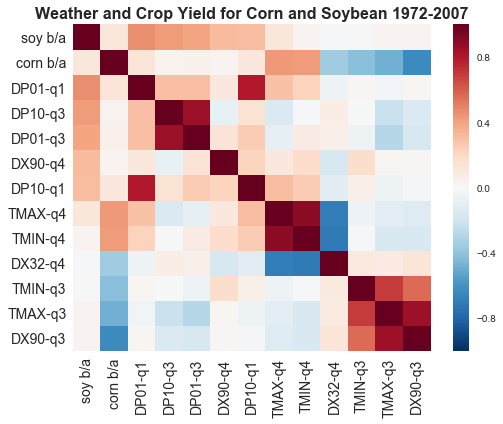

In [11]:
soybean_corrs = new_quarter_stats.corr()["soy b/a"].sort_values(ascending=False)
soybean_corrs = soybean_corrs[(soybean_corrs > 0.3)|(soybean_corrs < -0.3)]

corn_corrs = new_quarter_stats.corr()["corn b/a"].sort_values(ascending=False)
corn_corrs = corn_corrs[(corn_corrs > 0.3)|(corn_corrs < -0.3)]

corr_cols = soybean_corrs.index.tolist()
corr_cols.extend(corn_corrs.index.tolist())
corr_cols.insert(1, corr_cols.pop(corr_cols.index("corn b/a")))

import seaborn as sns
plt.figure(figsize=(8,6))

g = sns.heatmap(new_quarter_stats[corr_cols].corr())
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 14)
g.set_title("Weather and Crop Yield for Corn and Soybean 1972-2007", 
            fontweight='bold',fontsize=16)

print("Top Soy Correlations:")
print(soybean_corrs)
print("")
print("Top Corn Correlations:")
print(corn_corrs)

plt.show()

### Initial Summary:

Different factors appear to impact the two crops. This is consistent with the additional observation that corn yields and soy yields are not correlated with each other.

For soy, five strong (>=3) positive correlation factors were identified, 4 of which were precipitation metrics. 
DP01 and DP10 provide similar data- the number of days with 0.01 or 1 inch rain fall respectively. 
Overall, the DP01 gives stronger correlation than DP10. Additionally, PRCP (total rainfall) did not produce strong correlation at all. It therefore appears that consistent amounts rainfall is a better predictor than high amounts of rainfall or total rain. The number of days rain in Q1 (before planting) and Q3 (growth season) are important for soy, as is the number of days with temperature over 90F/32.2C in Q4 harvest (DX90).  The correlation of rain with yield before the planting season may indicate the importance of water moisture in the soil for germination and early growth. The plants may need the moisture themselves directly or it may promote the health of microorganism symbiotes in the soil. 

For corn, no rain metrics met the high stringency (>=|3|) cut off.  Temperature metrics, both min and max, for Q3 and Q4 (growth and harvest) showed strong correlations.  Higher Tmin and Tmax in Q3 (summer, growing season) were negatively correlated, indicating cooler (milder) summers being favorable, and higher Tmin and Tmax in Q4 (fall, harvest time) were negatively correlated, indicating warmer (milder) winters as favorable. 

In the next part, I look at the actual raw data for selected metrics to see if the correlative trends are convincing or potentially driven by outliers.  

*The highest performing metrics are DX90 (correlated with yield for both crops), DP01 (highest correlative factor for soy), and TMAX (highest for corn after DX90).  These three metrics will be visualized for both crops across all seaons:*

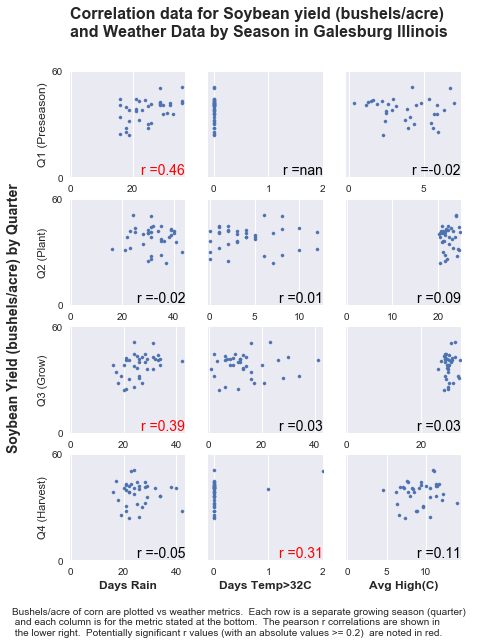

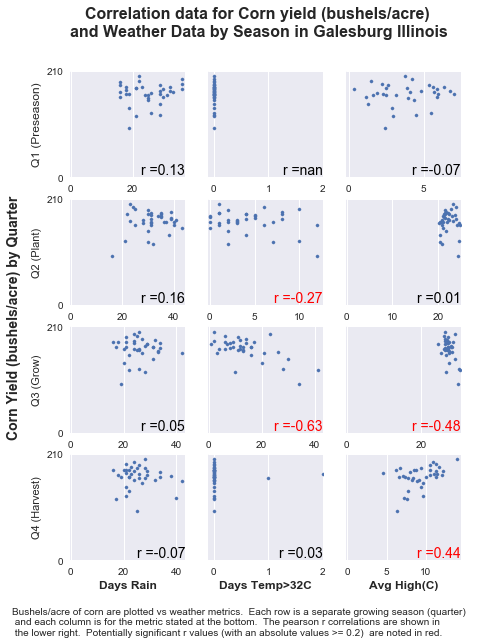

In [12]:
names = ["DP01", "DX90", "TMAX"]
new_corr_cols = ["year", 'soy b/a', 'corn b/a']
        
for i in range(1,5):
    for col in names:
        new_corr_cols.append(col+"-q"+str(i))
strong_corr = new_quarter_stats[new_corr_cols]

crops = ['Soybean', 'Corn']
for crop in crops:
    if crop == "Soybean":
        c = "soy b/a"
    else:
        c = "corn b/a"    
    fig, ((ax1,ax2,ax3), (ax4,ax5, ax6), (ax7,ax8,ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(6, 6), sharey=True)

    plt.suptitle("Correlation data for " + crop + 
                 " yield (bushels/acre) \nand Weather Data by Season in Galesburg Illinois", fontsize=16, fontweight='bold')
    fig.text(0.0, 0.5, crop + ' Yield (bushels/acre) by Quarter', va='center', fontsize=14, fontweight='bold', rotation='vertical')
    #plt.ylabel('common ylabel')
    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

    #obtain corr values to add text of correlation values
    for i, ax in enumerate(axes):
        col = new_corr_cols[(3+i)]
   
        ax.scatter(strong_corr[col], strong_corr[c], s=10)
        corr = np.round(strong_corr[col].corr(strong_corr[c]), decimals=2)
        if corr > 0.2: 
            ax.annotate("r ="+ str(corr)[0:4], xy=(1, 0), xycoords='axes fraction', color='red', fontsize=14,
                horizontalalignment='right', verticalalignment='bottom')
        elif corr < -0.2:
            ax.annotate("r =" + str(corr)[0:5], xy=(1, 0), xycoords='axes fraction', color='red', fontsize=14,
                horizontalalignment='right', verticalalignment='bottom')
        else:
            ax.annotate("r =" + str(corr)[0:5], xy=(1, 0), xycoords='axes fraction', color='black', fontsize=14,
                horizontalalignment='right', verticalalignment='bottom')
        if c == "soy b/a":
            limits =[0,60] 
        elif c == "corn b/a":
            limits =[0,210]
        ax.set_ylim(limits)
        plt.yticks(limits, limits, fontweight='bold')
        ax.set_xlim(left=-0.2, right=None)
            
    ax1.set_ylabel("Q1 (Preseason)", fontsize=12)
    ax4.set_ylabel("Q2 (Plant)")
    ax7.set_ylabel("Q3 (Grow)")
    ax10.set_ylabel("Q4 (Harvest)")
    
    ax2.set_xlim([-0.1, 2])
    ax11.set_xlim([-0.1, 2])
        
    ax10.set_xlabel("Days Rain", fontsize=12, fontweight='bold')
    ax11.set_xlabel("Days Temp>32C", fontsize=12, fontweight='bold')
    ax12.set_xlabel("Avg High(C)", fontsize=12, fontweight='bold')
    
    txt="Bushels/acre of corn are plotted vs weather metrics.  Each row is a separate growing season (quarter)  \n and each column is for the metric stated at the bottom.  The pearson r correlations are shown in \n the lower right.  Potentially significant r values (with an absolute values >= 0.2)  are noted in red.  "
    fig.text(0.01, .01, txt, ha='left')

    
  
    fig.set_size_inches(7,9, forward=True)

    plt.show()

### Final Summary and Discussion

For the above plots, correlation values are displayed in the lower right. Correlations that meet a moderate cutoff of |0.2| are noted in red. 

For soy, the yield correlation with DP01 (days rain >= 0.1 inch) displays a moderate trend visually for Q1 and Q3, consistent with the Pearson's R correlation data.  The DX90 (days over 32C) correlation with yield, however, looks like it is driven by a few outlier points. Pearson's R values are known to be affected by outliers and another correlation method may be more appropriated (for example, Spearman's correlation which checks for monotonically increasing relationships). Consistenly, rerunning the soy correlation with spearman results in a yield correlation with precipitation (DP01) but not with temperature metrics.

For corn, the correlation of yield with DX90 (days temp over 90F/32C) does look moderate but convincing with a decrease in crop yield for especially hotter summers (with more than 20 days over 90F/32C).  Q2 is less affected by hot days, suggesting that during the planting / germination, the plants are less susceptible to hot days.  Alternatively, it could be the days above 90F/32C in the summer (Q3) tend to be more extreme (larger highs) and that more adversely affects the plants.  

Why are there not stronger correlations between weather metrics and crop yields?  Sufficient irrigation may offset any adverse effects that would be caused by dry spells.  Alternatively, we are looking at somewhat broad geographical data as it is aggregated across an entire county; there could be more subtle effects that would be identified with more local records of crop yield and weather data.  Additionally, these crops are grown in the midwest because they are well suited for environment.  The yields of these crops may be robust to the variations in weather flucutations typically experienced in this region.